In [0]:
from random import random, randrange
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [0]:
# Constants for each cycle
SURVIVAL_THRESHOLD = 1
REPLICATION_THRESHOLD = 2
GRID_SIZE = 10
FOOD_QUANTITY = 10
DIRECTIONS = {0: (1, 0), 1: (1, 1), 2: (1, 0), 3: (-1, 1), 4: (-1, 0), 5: (-1, -1), 6: (0, -1), 7: (1, -1)}
INIT_BLOBS = 20
NUM_DAYS = 50

In [0]:
# Environment setup
def initialise_grid(size):
    global grid
    grid = np.full((size, size), False)

def spawn_food(food_quantity):
    # randomly choose positions to spawn food
    food_positions = []
    while len(food_positions) < FOOD_QUANTITY:
        x = math.floor(random() * GRID_SIZE)
        y = math.floor(random() * GRID_SIZE)
        position = (x, y)
        if position not in food_positions:
            food_positions.append(position)
    # spawn food at generated positions
    for position in food_positions:
        grid[position] = True

In [0]:
class Blob:
    def __init__(self, x, y):
        self.is_dead = False
        self.energy = 1
        self.x = x
        self.y = y
        self.VISION_RANGE = 1
        self.day_ended = True
    def pathfinder(self):
        # Greedy algorithm, returns a direction with relative values
        vis = self.VISION_RANGE
        for i in range(-vis, vis+1):
            for j in range(-vis, vis+1):
                if grid[self.x+i, self.y+j]:
                    return (i, j)
        # Random direction if nothing was found
        return (randrange(-vis, vis+1, 1), randrange(-vis, vis+1, 1))
    def die(self):
        self.is_dead = True
        self.day_ended = True
        self.energy = 0
    def move(self):
        self.interact()
        #direction = self.pathfinder()
        # Approximate to 1 of 8 possible directions on the grid
        # TODO: make this work in general for all possible directions
        #numerical_direction = math.floor(math.atan(abs(direction[1]) / abs(direction[0])) * (8 / (2 * math.pi)))
        # <temp>
        out_of_bounds = True
        while out_of_bounds:
            numerical_direction = randrange(0, 8, 1)
            relative_direction = DIRECTIONS[numerical_direction]
            try:
                grid[self.x+relative_direction[0], self.y+relative_direction[1]]
                out_of_bounds = False
            except:
                out_of_bounds = True
        # </temp>
        self.x += relative_direction[0]
        self.y += relative_direction[1]
        # Deduct energy cost
        self.energy -= 1 / GRID_SIZE
        if self.energy <= 0:
            self.die()
    def interact(self):
        # Eating
        if grid[self.x, self.y]:
            grid[self.x, self.y] = False
            self.energy += 1
        # Reached the edge
        if self.x == 0 or self.y == 0 or self.x == GRID_SIZE - 1 or self.y == GRID_SIZE:
            if self.energy >= 1:
                self.end_day()
    def end_day(self):
        self.day_ended = True
        if self.energy >= 2:
            self.replicate()
        self.energy = 1
    def replicate(self):
        blobs.append(Blob(self.x, self.y))

In [0]:
def spawn_blobs(n):
    blob_list = []
    for i in range(n):
        blob_list.append(Blob(randrange(0, GRID_SIZE, 1), randrange(0, GRID_SIZE, 1)))
    return blob_list

Text(0, 0.5, 'Number of Blobs')

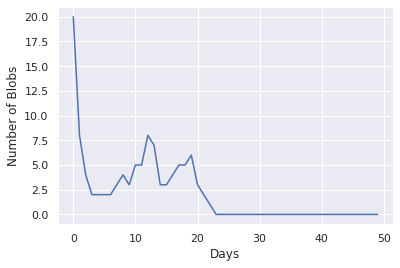

In [165]:
# Preparing the map
initialise_grid(GRID_SIZE)
blobs = spawn_blobs(INIT_BLOBS)
# TODO: change it to everyone moving at once, instead of everyone waiting their turn to go through their day
stats = []
for day in range(NUM_DAYS):
    spawn_food(FOOD_QUANTITY)
    stats.append(np.sum([(not blob.is_dead) for blob in blobs]))
    for blob in blobs:
        if not blob.is_dead:
            blob.day_ended = False
    while np.sum([(not blob.day_ended) for blob in blobs]) > 0:
        for blob in blobs:
            if not blob.is_dead and not blob.day_ended:
                blob.move()

sns.set()
plt.plot(range(0, NUM_DAYS), stats)
plt.xlabel("Days")
plt.ylabel("Number of Blobs")